<a href="https://colab.research.google.com/github/ProfAI/tf00/blob/master/leaf_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificazione di Foglie

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle as shuffle_func

import tensorflow as tf

In [2]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

--2020-06-25 11:01:17--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip.1’

train.zip.1         100%[===================>] 137.15M   146MB/s    in 0.9s    

2020-06-25 11:01:18 (146 MB/s) - ‘train.zip.1’ saved [143812152/143812152]

--2020-06-25 11:01:19--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip’

validation.zip      100%[===================>]  17.65M  91.8MB/

In [4]:
!unzip -qq train.zip
!unzip -qq validation.zip
!unzip -qq test.zip

replace train/healthy/healthy_train.265.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [5]:
IMG_SIZE = (150, 150)

In [6]:
def load_data(path="/", shuffle=True):

  imgs = []
  labels = []
  label_to_int = {}
  for i, label in enumerate(os.listdir(path)):

    label_to_int[label] = i

    for img_file in os.listdir(path+label):

      img = cv2.imread(path+label+"/"+img_file)
      
      if img is None:
        continue
        
      img = cv2.resize(img, IMG_SIZE)
      imgs.append(img)
      labels.append(i)

  imgs = np.array(imgs)
  labels = np.array(labels)

  if shuffle:
    imgs, labels = shuffle_func(imgs, labels)

  return imgs, labels, label_to_int

In [7]:
X_train, labels_train, label_to_int = load_data(path="train/")
X_valid, labels_valid, _ = load_data(path="validation/")
X_test, labels_test, _ = load_data(path="test/")

print(label_to_int)
print(_)

{'bean_rust': 0, 'healthy': 1, 'angular_leaf_spot': 2}
{'bean_rust': 0, 'healthy': 1, 'angular_leaf_spot': 2}


2


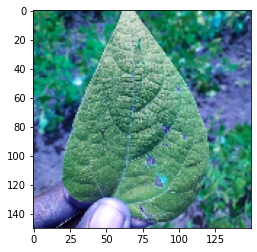

In [50]:
plt.imshow(imgs[0])
print(labels[0])

In [8]:
Y_train = tf.one_hot(labels_train, 3).numpy()
Y_valid = tf.one_hot(labels_valid, 3).numpy()
Y_test = tf.one_hot(labels_test, 3).numpy()